In [36]:
import os
import json
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import torch

# Append project to path
root_dir = os.path.join(os.getcwd(), "..")
sys.path.append(root_dir)

In [2]:
path = "/Users/lichenghu/desktop/DSC180A-Project1/config/LeNet_config.json"
with open(path) as json_file:
    config = json.load(json_file)
# config['data']['path'] = "../data"

In [3]:
config['model']['save_path']="/Users/lichenghu/desktop/DSC180A-Project1/models/LeNet.pth"

In [4]:
from src.model.get_model import get_model
LeNet_model = get_model(config)

Creating model...
Model LeNet created


In [5]:
from src.model.model_files import read_model
read_model(LeNet_model, config)

Model read successfully from /Users/lichenghu/desktop/DSC180A-Project1/models/LeNet.pth


In [6]:
LeNet_model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
LeNet_model.conv1.weight.data.shape

torch.Size([6, 1, 5, 5])

In [12]:
LeNet_model.conv1.weight.data

tensor([[[[ 1.6808e-01,  5.2668e-03, -1.6404e-01, -3.0825e-03,  7.7227e-02],
          [ 2.9394e-01,  6.5132e-02, -4.2218e-01, -3.1320e-01, -6.5769e-02],
          [ 9.0404e-02, -4.8460e-02,  1.0503e-01,  2.9693e-03,  1.5778e-01],
          [-6.2695e-02,  2.7349e-01,  3.0933e-01,  1.1550e-01,  8.2548e-02],
          [ 3.0046e-03,  1.0804e-02, -1.4074e-01, -4.9209e-02, -5.3913e-02]]],


        [[[-1.5122e-01, -1.9201e-01, -4.8928e-01,  1.5123e-02,  9.5619e-02],
          [ 8.6676e-02,  1.6892e-01, -3.0196e-01,  1.9773e-02,  7.4948e-05],
          [ 1.3972e-02,  5.0549e-02, -7.7697e-02,  1.0499e-02,  1.0217e-02],
          [ 5.2021e-02,  1.3500e-01, -1.8694e-02,  1.8845e-01, -1.2761e-01],
          [ 2.9576e-01,  3.4751e-01,  2.1208e-01,  3.1659e-01,  2.9229e-02]]],


        [[[-1.9135e-03,  1.8109e-01,  9.9452e-02,  1.4594e-01, -8.7572e-02],
          [ 3.3110e-01,  2.7847e-01, -1.0971e-01,  3.2838e-03,  9.6290e-02],
          [-1.4695e-02,  2.2463e-01,  2.3842e-01, -1.2308e-01, -2.42

# Flatten

In [112]:
c_out, c_in, p, q = LeNet_model.conv1.weight.data.shape
W = LeNet_model.conv1.weight.data.reshape(c_out, -1)

In [113]:
W.shape

torch.Size([6, 25])

In [114]:
W

tensor([[ 1.6808e-01,  5.2668e-03, -1.6404e-01, -3.0825e-03,  7.7227e-02,
          2.9394e-01,  6.5132e-02, -4.2218e-01, -3.1320e-01, -6.5769e-02,
          9.0404e-02, -4.8460e-02,  1.0503e-01,  2.9693e-03,  1.5778e-01,
         -6.2695e-02,  2.7349e-01,  3.0933e-01,  1.1550e-01,  8.2548e-02,
          3.0046e-03,  1.0804e-02, -1.4074e-01, -4.9209e-02, -5.3913e-02],
        [-1.5122e-01, -1.9201e-01, -4.8928e-01,  1.5123e-02,  9.5619e-02,
          8.6676e-02,  1.6892e-01, -3.0196e-01,  1.9773e-02,  7.4948e-05,
          1.3972e-02,  5.0549e-02, -7.7697e-02,  1.0499e-02,  1.0217e-02,
          5.2021e-02,  1.3500e-01, -1.8694e-02,  1.8845e-01, -1.2761e-01,
          2.9576e-01,  3.4751e-01,  2.1208e-01,  3.1659e-01,  2.9229e-02],
        [-1.9135e-03,  1.8109e-01,  9.9452e-02,  1.4594e-01, -8.7572e-02,
          3.3110e-01,  2.7847e-01, -1.0971e-01,  3.2838e-03,  9.6290e-02,
         -1.4695e-02,  2.2463e-01,  2.3842e-01, -1.2308e-01, -2.4289e-01,
         -1.1695e-01, -1.6594e-01,  

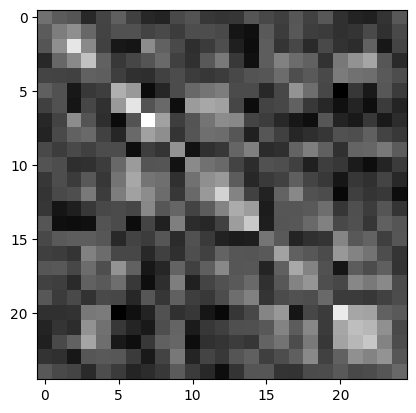

In [25]:
plt.imshow(M.T@M,cmap="gray")

## Sum of all filter

In [102]:
LeNet_model.conv1.weight.data

tensor([[[[ 1.6808e-01,  5.2668e-03, -1.6404e-01, -3.0825e-03,  7.7227e-02],
          [ 2.9394e-01,  6.5132e-02, -4.2218e-01, -3.1320e-01, -6.5769e-02],
          [ 9.0404e-02, -4.8460e-02,  1.0503e-01,  2.9693e-03,  1.5778e-01],
          [-6.2695e-02,  2.7349e-01,  3.0933e-01,  1.1550e-01,  8.2548e-02],
          [ 3.0046e-03,  1.0804e-02, -1.4074e-01, -4.9209e-02, -5.3913e-02]]],


        [[[-1.5122e-01, -1.9201e-01, -4.8928e-01,  1.5123e-02,  9.5619e-02],
          [ 8.6676e-02,  1.6892e-01, -3.0196e-01,  1.9773e-02,  7.4948e-05],
          [ 1.3972e-02,  5.0549e-02, -7.7697e-02,  1.0499e-02,  1.0217e-02],
          [ 5.2021e-02,  1.3500e-01, -1.8694e-02,  1.8845e-01, -1.2761e-01],
          [ 2.9576e-01,  3.4751e-01,  2.1208e-01,  3.1659e-01,  2.9229e-02]]],


        [[[-1.9135e-03,  1.8109e-01,  9.9452e-02,  1.4594e-01, -8.7572e-02],
          [ 3.3110e-01,  2.7847e-01, -1.0971e-01,  3.2838e-03,  9.6290e-02],
          [-1.4695e-02,  2.2463e-01,  2.3842e-01, -1.2308e-01, -2.42

In [103]:
first_layer=np.array(LeNet_model.conv1.weight.data[0][0])
first_layer

array([[ 0.16807655,  0.00526678, -0.16404095, -0.00308248,  0.07722723],
       [ 0.29394493,  0.06513172, -0.4221787 , -0.31319636, -0.06576869],
       [ 0.09040447, -0.04845965,  0.10502929,  0.00296933,  0.15777984],
       [-0.06269513,  0.27349198,  0.30933467,  0.11549531,  0.08254819],
       [ 0.00300458,  0.01080433, -0.14073928, -0.04920934, -0.05391252]],
      dtype=float32)

In [104]:
for i in range(1,len(LeNet_model.conv1.weight.data)):
    print(LeNet_model.conv1.weight.data[i][0])
    first_layer+=np.array(LeNet_model.conv1.weight.data[i][0])

tensor([[-1.5122e-01, -1.9201e-01, -4.8928e-01,  1.5123e-02,  9.5619e-02],
        [ 8.6676e-02,  1.6892e-01, -3.0196e-01,  1.9773e-02,  7.4948e-05],
        [ 1.3972e-02,  5.0549e-02, -7.7697e-02,  1.0499e-02,  1.0217e-02],
        [ 5.2021e-02,  1.3500e-01, -1.8694e-02,  1.8845e-01, -1.2761e-01],
        [ 2.9576e-01,  3.4751e-01,  2.1208e-01,  3.1659e-01,  2.9229e-02]])
tensor([[-0.0019,  0.1811,  0.0995,  0.1459, -0.0876],
        [ 0.3311,  0.2785, -0.1097,  0.0033,  0.0963],
        [-0.0147,  0.2246,  0.2384, -0.1231, -0.2429],
        [-0.1170, -0.1659,  0.3180,  0.1981, -0.1101],
        [-0.4072, -0.0137,  0.0046,  0.1178, -0.0732]])
tensor([[-0.1400, -0.1293,  0.0470,  0.2490,  0.0902],
        [-0.0856, -0.2787,  0.1399,  0.0255,  0.2592],
        [-0.2790, -0.0448,  0.1964,  0.3181,  0.2820],
        [-0.1618,  0.1519,  0.1872,  0.2576,  0.1254],
        [ 0.0618,  0.3059,  0.3103,  0.1869, -0.0911]])
tensor([[ 0.0348,  0.1790,  0.2823,  0.2522,  0.1298],
        [-0.1808,

In [105]:
first_layer

array([[ 0.05152261, -0.04339923, -0.38876575,  0.27196187,  0.2660597 ],
       [ 0.51656675, -0.38586515, -1.231637  , -0.60583115,  0.6473638 ],
       [-0.5647317 , -0.2891454 , -0.20799881, -0.09522951,  0.34197956],
       [-0.21465439,  0.2241104 ,  0.7822756 ,  0.99256504,  0.01866344],
       [ 0.10022844,  0.81259394,  0.61678267,  0.8066884 ,  0.13903664]],
      dtype=float32)

plt.imshow(first_layer.T@first_layer,cmap="gray")

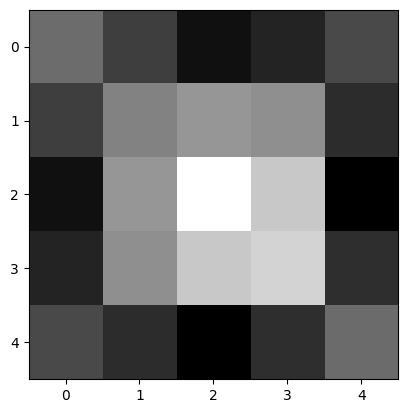

In [110]:
plt.imshow(avg_first_later.T@avg_first_later,cmap="gray")

## Plot for each filter

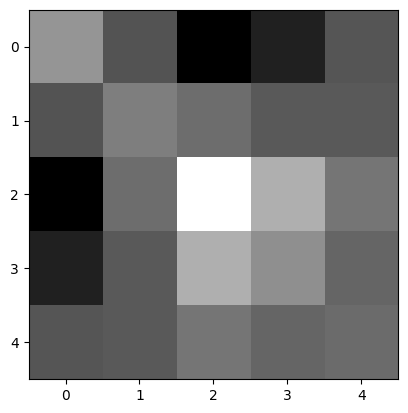

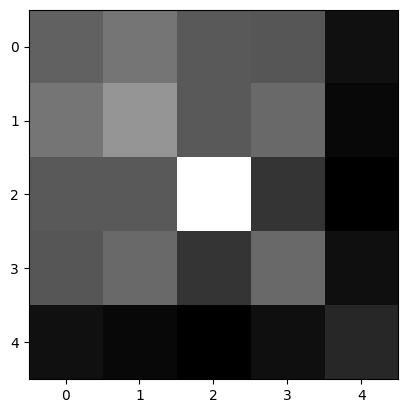

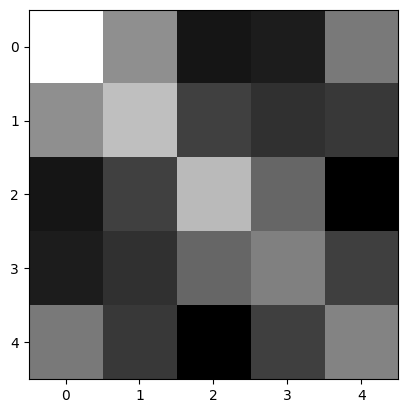

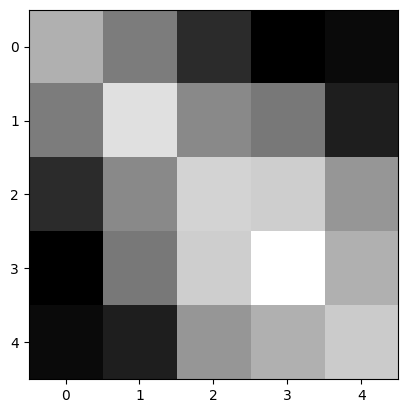

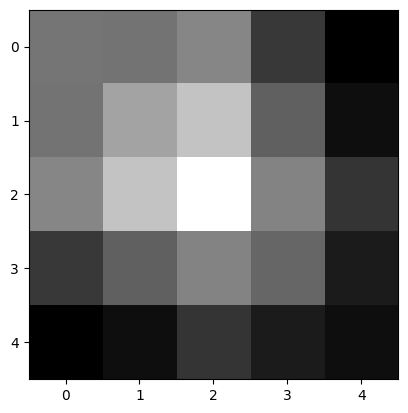

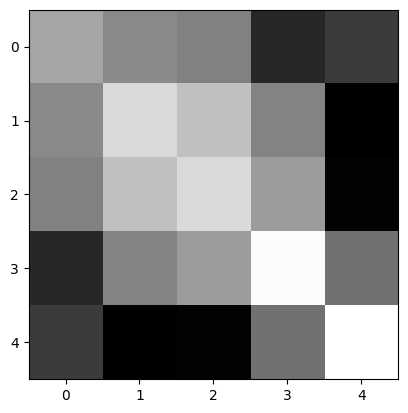

In [119]:
for i in LeNet_model.conv1.weight.data:
    w=i[0]
    plt.imshow(w.T@w,cmap="gray")
    plt.show()